In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# read data
data1 = pd.read_csv("set1.csv", parse_dates=True, index_col='DATETIME')
data2 = pd.read_csv("set2.csv", parse_dates=True, index_col='DATETIME')

# normalize data to have zero mean and unit variance
# pca does not work well with non-normalized data
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
train = scaler.fit_transform(data1)
test = scaler.fit_transform(data2)

train = pd.DataFrame(train)
test = pd.DataFrame(test)

# remove flag as you should not do pca on this column
train.drop(train.columns[[-1]], axis=1, inplace=True)
test.drop(test.columns[[-1]], axis=1, inplace=True)

print train.shape, test.shape
# check if data is indeed scaled by looking at values (we also checked means and std, not shown here)
train

(8761, 43) (4177, 43)


,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,-1.801668,-0.842161,-1.489735,-1.437100,-0.125305,-0.302092,-2.099840,-0.191837,0.0,0.699708,...,-0.488928,0.968475,-0.470930,0.195802,-1.257323,0.754447,-1.255191,-0.149604,-1.032124,-0.363355
1,-1.882432,-0.869352,-0.824341,-1.364756,0.514449,0.701151,-1.750272,-0.182138,0.0,0.702016,...,-0.490217,1.186235,-0.473974,0.421522,-1.269177,0.771176,-1.266938,-0.139625,-1.039972,-0.375851
2,-1.959306,-0.885000,-0.090841,-0.577060,1.124164,0.730143,-1.274787,-0.249309,0.0,0.686032,...,-0.488463,1.376247,-0.473960,0.512476,-1.099823,0.955458,-1.096348,0.846406,-1.039905,-0.375745
3,-1.948692,-0.869262,0.695223,0.326835,1.638064,0.730143,-0.119569,-0.333484,0.0,0.666001,...,-0.454815,1.558041,-0.441443,0.704155,0.356598,-0.981428,0.351616,1.569917,-1.017362,-0.339848
4,-1.823477,-0.814892,1.527235,1.559097,1.029043,0.730143,1.371911,-0.355788,0.0,0.660693,...,-0.399478,1.780077,-0.387166,1.024304,0.397696,-0.973794,0.392623,1.650446,-0.987991,-0.293079
5,-1.567741,-0.349035,1.406169,0.684055,0.603062,-0.268771,0.827983,-0.675810,0.0,0.584540,...,1.341567,-0.302801,1.347928,-1.986658,1.338917,-1.011567,1.352876,-1.426862,-0.001540,1.277703
6,-1.238965,0.170456,1.152864,-1.019446,0.151520,-1.711524,-0.392384,-0.564093,0.0,0.611124,...,0.544630,-0.438137,0.530350,0.626189,1.256980,-1.115447,1.271347,-1.750692,-0.460024,0.547632
7,-1.044547,0.399839,0.804269,0.025487,-0.528161,-1.227340,-0.421006,-0.395955,0.0,0.651135,...,0.523217,-0.684696,0.508620,0.545347,0.471631,-1.225933,0.462477,0.166696,-0.485666,0.506801
8,-0.949459,0.580637,0.318548,0.724831,-1.360176,0.143129,-0.089377,-0.393683,0.0,0.651676,...,0.617364,-0.617960,0.604205,0.920639,0.487295,-1.383917,0.478215,0.244335,-0.429174,0.596756
9,-0.914781,0.826872,-0.105633,1.230250,-1.471146,0.730143,0.393346,-0.375154,0.0,0.656085,...,1.388092,-1.182424,1.394803,-2.855537,-1.032025,0.702949,-1.031010,0.039785,0.006320,1.290219


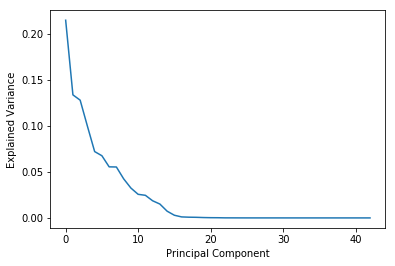

In [31]:
# start calculating principle components
pcs = decomposition.PCA()
pcs.fit(train)
model = pcs.transform(train)

# plot variance captured per principal component
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.plot(pcs.explained_variance_ratio_)

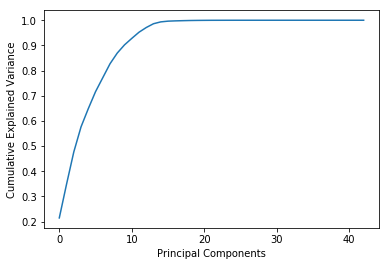

In [32]:
# plot cumulative variance captured of principle components
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pcs.explained_variance_ratio_.cumsum())

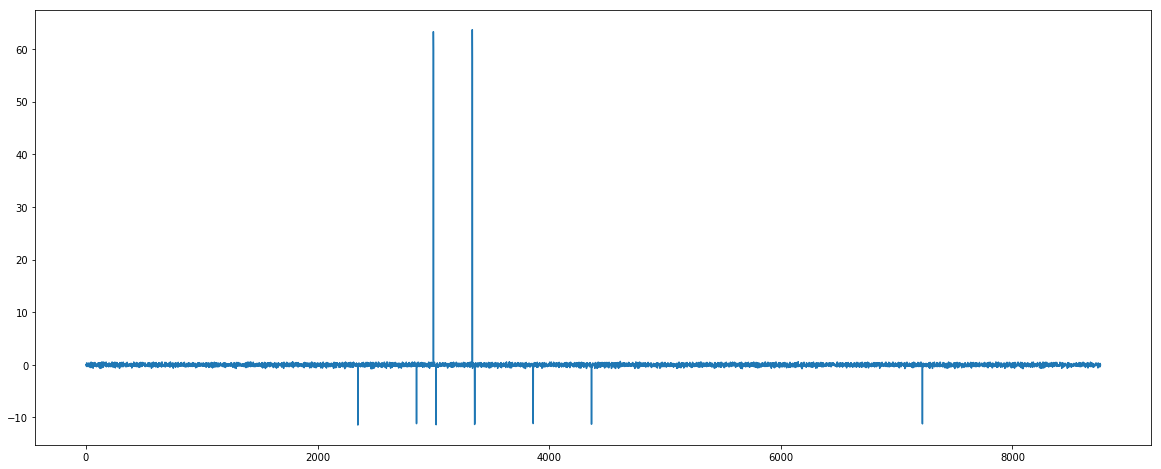

In [76]:
# we now use the method from Lakhina et al. (see report) to check which pcs should model the normal/anomalous subspace
# looks like pc 6 starts showing spikes
plt.rcParams["figure.figsize"] = (20,8)
plt.plot(model[:,6])

In [82]:
target = data2.columns[-1]

eigenvectors = pcs.components_

# Matrix P represents principal components corresponding to normal subspace
P = np.transpose(eigenvectors[:-5])
print P.shape, P
P_T = np.transpose(P)
C = np.dot(P, P_T)

# Identity Matrix with dimensions 43 X 43
I = np.identity(43)

# y_residual is the projection of test data on anomalous subspace
y_residual = np.zeros((test.shape))

# Calculate projection of test data on anomalous subspace
for i in range(test.shape[0]):
    # Convert row to column vector
    y = np.transpose(test[i])
    y_residual[i] = np.dot(I - C, y)
    

#Calculate SPE for each y_residual#Calcula 
spe = np.zeros((test.shape[0]))

# na will be set to 1 if the spe is greater than the threshold 
na = np.zeros((test.shape[0]))
threshold = 500
for i in range(test.shape[0]):
    spe[i] = np.square(np.sum(np.subtract(y_residual[i], test[i])))     
    
    # if spe is greater than threshold then classify as attack by setting na to 1
    if(spe[i] > threshold):
        na[i] = 1
        
plt.plot(spe)

(43L, 38L) [[-6.53428920e-02  1.06260969e-01  2.10829739e-01 ...  8.94562335e-06
   0.00000000e+00  0.00000000e+00]
 [ 1.63062719e-01 -1.78238305e-01 -5.88840038e-02 ...  2.79862336e-06
  -1.56893780e-15 -6.17951008e-18]
 [ 1.48014965e-01  1.07170826e-01  3.13104406e-02 ...  2.18047719e-07
  -2.64394678e-16  1.63586977e-16]
 ...
 [-1.14184986e-01 -1.08851213e-01 -6.00562156e-02 ...  3.52714706e-06
  -8.51969293e-16  1.38303470e-17]
 [ 9.57463666e-04 -9.32523432e-02  3.35561988e-01 ...  4.01082256e-06
  -3.75369425e-15  2.09971291e-16]
 [ 2.83907205e-01 -1.22507507e-02 -2.58533944e-01 ...  5.85388407e-05
   8.11799754e-16  2.23279363e-16]]


ValueError: shapes (43,43) and (4177,) not aligned: 43 (dim 1) != 4177 (dim 0)

In [ ]:
tp = 0
fp = 0
tn = 0
fn = 0
for i in range(test.shape[0]):
    if(labels[i] == 'Attack' and na[i] == 1):
        tp = tp + 1
    if(labels[i] == 'Normal' and na[i] == 1):
        fp = fp + 1
    if(labels[i] == 'Normal' and na[i] == 0):
        fn = fn + 1    
    if(labels[i] == 'Attack' and na[i] == 0):
        tn = tn + 1
print tp
print fp
print fn
print tn